# 9 - MODELO DE EJECUCIÓN CON LOS DATOS DE PRUEBA

En este modelo vamos a cargar el dataset de prueba y realizaremos calidad de datos, transformación de variables, separaremos predictoras y target, predeciremos sobre los datos de prueba y evaluaremos el modelo.

## IMPORTAR LOS PAQUETES

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Transformación de variables
from sklearn.preprocessing import OrdinalEncoder

#metricas de evaluación
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import label_binarize
from sklearn.metrics import classification_report

## CARGAR LOS DATOS

In [5]:
df = pd.read_csv('../../02_Datos/02_Validacion/prueba.csv', index_col= 0)
df.head()

,precio_compra,precio_mto,n_puertas,n_personas,t_maletero,nivel_seguridad,aceptabilidad
1134,med,med,4,2,small,low,unacc
880,med,vhigh,2,4,big,med,acc
1578,low,med,4,4,med,low,unacc
496,high,vhigh,4,4,small,med,unacc
153,vhigh,high,3,more,small,low,unacc


## ESTRUCTURA DEL DATASET

### TRANSFORMACIÓN DE VARIABLES

In [13]:
# Variables a aplicar Ordinal Encoder
var_oe = ['precio_compra', 'precio_mto', 'n_puertas', 'n_personas',
        't_maletero',  'nivel_seguridad', 'aceptabilidad']

# Orden de los valores de las variables
orden_precio_compra = ['low','med','high','vhigh']
orden_precio_mto = ['low','med','high','vhigh']
orden_n_puertas = ['2','3','4','5more']
orden_n_personas = ['2','4','more']
orden_t_maletero = ['small','med','big']
orden_nivel_seguridad = ['low','med','high']
orden_aceptabilidad = ['unacc','acc','good','vgood']

categorias = [orden_precio_compra, 
              orden_precio_mto,
              orden_n_puertas,
              orden_n_personas,
              orden_t_maletero,
              orden_nivel_seguridad,
              orden_aceptabilidad]

# Instanciar
oe = OrdinalEncoder(categories = categorias,
                    handle_unknown = 'use_encoded_value',
                    unknown_value = 10)
# Entrenar y aplicar
df_oe = oe.fit_transform(df[var_oe])

# Guardar como dataframe
nombres_oe = [variable + '_oe' for variable in var_oe]
df_oe = pd.DataFrame(df_oe, columns = nombres_oe)
df_oe.head()

,precio_compra_oe,precio_mto_oe,n_puertas_oe,n_personas_oe,t_maletero_oe,nivel_seguridad_oe,aceptabilidad_oe
0,1.0,1.0,2.0,0.0,0.0,0.0,0.0
1,1.0,3.0,0.0,1.0,2.0,1.0,1.0
2,0.0,1.0,2.0,1.0,1.0,0.0,0.0
3,2.0,3.0,2.0,1.0,0.0,1.0,0.0
4,3.0,2.0,1.0,2.0,0.0,0.0,0.0


In [17]:
df_oe.shape

(518, 7)

### SEPARAR PREDICTORAS Y TARGET

In [23]:
x = df_oe.drop(columns = 'aceptabilidad_oe').copy()
y = df_oe.aceptabilidad_oe.copy()

## MODELIZAR CON EL PIPE DE EJECUCCIÓN

### CARGAMOS EL PIPE DE EJECUCIÓN

In [27]:
modelo = pd.read_pickle('../../04_Modelos/pipe_ejecucion_v3.pickle')

## PREDECIR Y EVALUAR CON DATASET DE PRUEBA

### PREDECIR SOBRE LOS DATOS

In [30]:
pred = modelo.predict(x)

### EVALUAR SOBRE LOS DATOS

In [34]:
v_accuracy = accuracy_score(y, pred)
v_report = classification_report(y, pred)

print(f"Accuracy: {v_accuracy}")
print(f"Classification Report:\n{v_report}")

Accuracy: 0.9864864864864865
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       352
         1.0       0.98      0.97      0.97       125
         2.0       0.90      0.90      0.90        21
         3.0       1.00      1.00      1.00        20

    accuracy                           0.99       518
   macro avg       0.97      0.97      0.97       518
weighted avg       0.99      0.99      0.99       518



## REPORTING DEL MODELO

Matrix de Confusión MultiClass y ROC CHART MULTICLASS

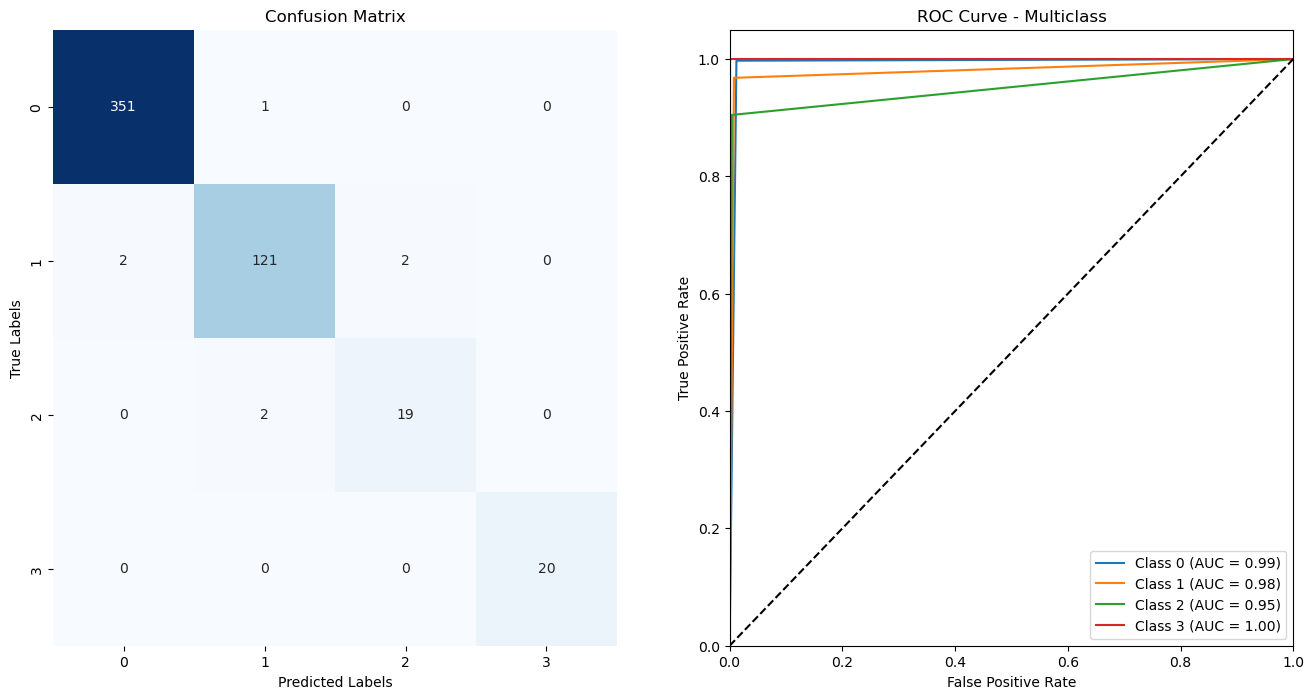

In [42]:
# Crear subplots
f, ax = plt.subplots(1, 2, figsize=(16,8))
ax = ax.flat

# Calcular la matriz de confusión
cm = confusion_matrix(y, pred)

# Crear un mapa de calor de la matriz de confusión
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False, ax=ax[0])
ax[0].set_xlabel("Predicted Labels")
ax[0].set_ylabel("True Labels")
ax[0].set_title("Confusion Matrix")

# Binarizar las etiquetas verdaderas y las predicciones para cada clase
n_classes = len(np.unique(y))
binarized_val_y = label_binarize(y, classes=np.arange(n_classes))
binarized_pred = label_binarize(pred, classes=np.arange(n_classes))

# Calcular la curva ROC y el área bajo la curva (AUC) para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(binarized_val_y[:, i], binarized_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

for i in range(n_classes):
    ax[1].plot(fpr[i], tpr[i], label='Class {0} (AUC = {1:.2f})'.format(i, roc_auc[i]))

ax[1].plot([0, 1], [0, 1], 'k--')
ax[1].set_xlim([0.0, 1.0])
ax[1].set_ylim([0.0, 1.05])
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('ROC Curve - Multiclass')
ax[1].legend(loc="lower right");


**CONCLUSIÓN:** 

El modelo ha funcionado muy bien con los datos de prueba, no se aprecia sobre ajuste del modelo y se ha obtenido tanto en train, validación y prueba (nuevos datos) un accuracy del 99%. Se revisamos cada clase, la predicción está por encima del 95%, siendo la clase 2 (good - buena) la clase con peor predicción pero el AUC está dentro de unos valores de predicción muy buenos. 